In [2]:
from PerceptronREG import PerceptronREG
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
df = pd.read_csv('ionosphere.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [4]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [5]:
le.classes_ # array position == label

array(['b', 'g'], dtype=object)

In [6]:
X = df.drop(34, axis=1)
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(280, 34) (71, 34)


In [7]:
p_no_reg = PerceptronREG()
p_no_reg.fit(X_train, y_train)
y_pred_no_reg = p_no_reg.predict(X_test)
accuracy_score(list(y_test), y_pred_no_reg)

0.9154929577464789

In [8]:
p_w_reg = PerceptronREG(alpha=0.01) # l2 reg
p_w_reg.fit(X_train, y_train)
y_pred_w_reg = p_w_reg.predict(X_test)
accuracy_score(list(y_test), y_pred_w_reg)

0.8873239436619719

Both accuracies surpassing 80% suggests that regularization may have helped avoid overfitting, but was not able to improve overall performance. This is not a definitive conclusion, and it requires further investigation. Methodology applied below: plotting, for both perceptrons, the confusion matrix and the learning curve.

Extracting insight

In [9]:
def plot_confusion_matrix(model, y_pred, y_test, ax=None):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion Matrix')
    print(f'Acurácia = {accuracy_score(list(y_test), y_pred)}')

[[20  5]
 [ 1 45]]
Acurácia = 0.9154929577464789
[[17  8]
 [ 0 46]]
Acurácia = 0.8873239436619719


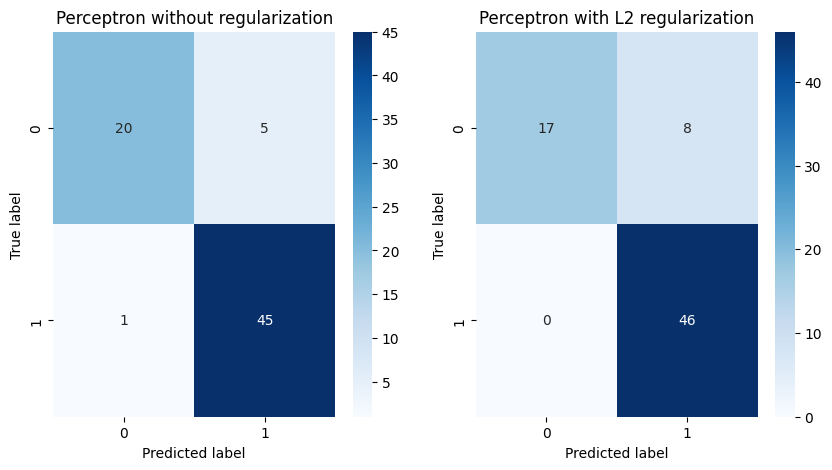

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plot_confusion_matrix(p_no_reg, y_pred_no_reg, list(y_test), ax=axs[0])
axs[0].set_title('Perceptron without regularization')
plot_confusion_matrix(p_w_reg, y_pred_w_reg, list(y_test), ax=axs[1])
axs[1].set_title('Perceptron with L2 regularization')
plt.show()

As we can observe, the "regularized" perceptron showed an increase in false positives, while the perceptron "unregularized" presented more false negatives. According to UCI and it's provided dataset description, the data targets are free electrons in the ionosphere, and "Bad" (labeled as 0 by LabelEncoder) radars returns does not show evidence of some type of structure in the ionosphere. In that context, we aim to minimize the false negatives.

In [21]:
def plot_lr_curve(models, X_train_samples, X_test_samples):
    X_train, y_train = X_train_samples
    X_test, y_test = X_test_samples

    fig, axs = plt.subplots(nrows=1, ncols=len(models), figsize=(15,5))

    sizes = np.linspace(0.1, 1.0, 10)
    for i, model in enumerate(models):
        train_acc = []
        test_acc = []
        for size in sizes:
            size = int(size * len(X_train))
            model.fit(X_train[:size], y_train[:size])
            y_train_pred = model.predict(X_train[:size])
            y_test_pred = model.predict(X_test)
            train_acc.append(accuracy_score(list(y_train[:size]), y_train_pred))
            test_acc.append(accuracy_score(list(y_test), y_test_pred))

        axs[i].plot(sizes, train_acc, label='Training accuracy')
        axs[i].plot(sizes, test_acc, label='Testing accuracy')
        axs[i].set_xlabel('Training set size')
        axs[i].set_ylabel('Accuracy')
        axs[i].legend()
    axs[0].set_title('No regularization')
    axs[1].set_title('With L2 regularization')

    plt.tight_layout()
    plt.show()

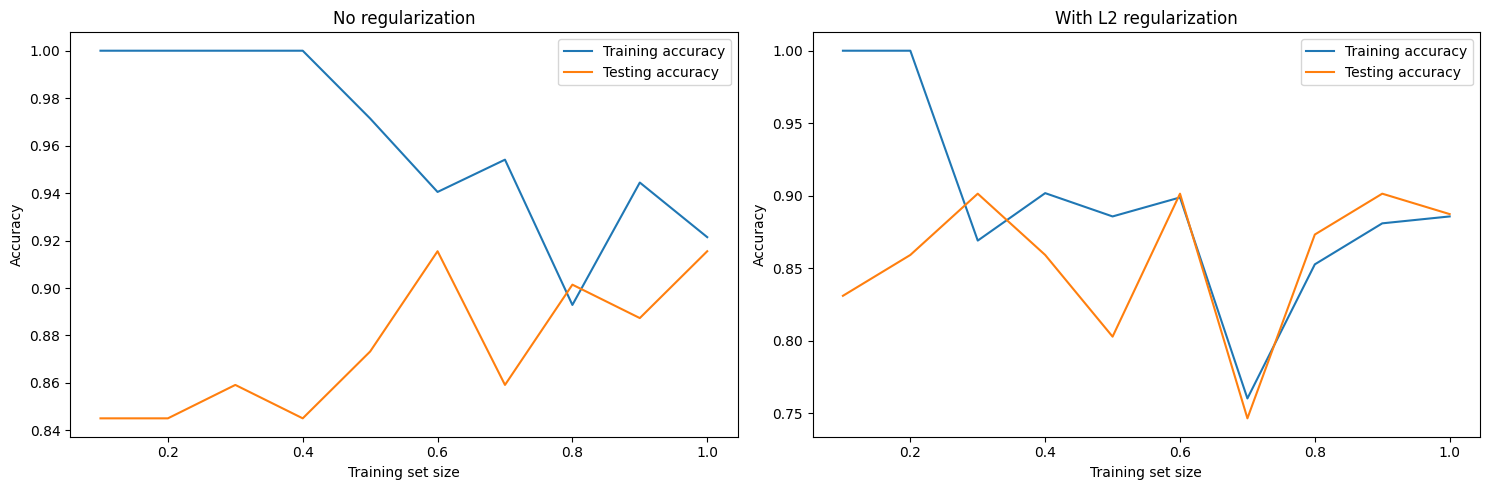

In [22]:
plot_lr_curve((p_no_reg, p_w_reg), (X_train, y_train), (X_test, y_test))

Finally, we can choose the regularized version as the winner for this classification task. <br>
The raw perceptron had higher accuracies on the training set, but its acc on the test set was lower as the training set size increased. On the other hand, the model with alpha 0.01 showed slightly lower accuracies on the training set, but had a more consistent acc on the test set. Based on this, it can be said that the model with regularization performed better, as it presented a more consistent accuracy on the test set and showed less tendency towards overfitting compared to the model without regularization.

maybe a #TODO: test values for alpha